In [ ]:
import torch 
import numpy as np
import pandas as pd     
from torch.autograd import Variable     
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
from sklearn.model_selection import train_test_split
import os
import time

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
2*2

4

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
training_dataset = datasets.CIFAR10(root='/home/arti/DL/Datasets/Cifar10',  train=True, download=True, transform=transforms.ToTensor()) # Data augmentation is only done on training images
validation_dataset = datasets.CIFAR10(root='/home/arti/DL/Datasets/Cifar10',  train=False, download=True, transform=transforms.ToTensor())
 
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True) # Batch size of 100 i.e to work with 100 images at a time
val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


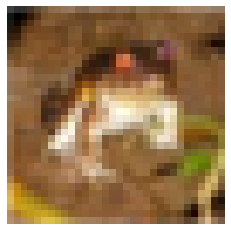

In [40]:
# visualize one of the images in data set
plt.imshow(training_dataset.data[0].reshape(32,32,3))
plt.axis("off")
plt.savefig('graph.png')
plt.show()

In [41]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.bn1 = torch.nn.BatchNorm2d(16)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.bn1 = torch.nn.BatchNorm2d(64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        # Fully connected 1
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)
          
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        # Max pool 1
        out = self.maxpool1(out)
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        # Max pool 2 
        out = self.maxpool2(out)
        # Convolution 3
        out = self.cnn3(out)
        out = self.relu3(out)
        # Max pool 3
        out = self.maxpool3(out)
        # flatten
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.fc1(out)
        self.dropout1(out)
        out = self.fc2(out)
        
        return out
    

In [87]:
batch_size = 100

In [88]:
# Create CNN
model = CNNModel().to(device)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

In [89]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [101]:
epochs = 100
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for epoch in range(epochs):
    
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for images, labels in train_loader:
        
        images, labels = images.to(device), labels.to(device)
        #print(images.shape) - torch.Size([100, 3, 32, 32])
        
        t_outputs = model(images) # every batch of 100 images are put as an input.
        t_loss = error(t_outputs, labels)
        
        optimizer.zero_grad() #setting the initial gradient to 0
        t_loss.backward() # backpropagating the loss
        optimizer.step() # updating the weights and bias values for every single step.
        
        preds = torch.max(t_outputs, 1)[1] # taking the highest value of prediction.
        running_loss += t_loss.item()
        running_corrects += torch.sum(preds == labels.data) # calculating te accuracy by taking the sum of all the correct predictions in a batch.

    # Epoch Validation
    else:
        with torch.no_grad(): # we do not need gradient for validation.
            for v_images, v_labels in val_loader:
                v_images, v_labels = v_images.to(device), v_labels.to(device)
                
                val_outputs = model(v_images)
                val_loss = error(val_outputs, v_labels)

                val_preds = torch.max(val_outputs, 1)[1]
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == v_labels.data)
    
    # Total Epoch loss and Acc
    epoch_loss = running_loss/len(train_loader) # loss per epoch
    epoch_acc = running_corrects.float()/ len(train_loader) # accuracy per epoch
    running_loss_history.append(epoch_loss) # appending for displaying 
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(val_loader)
    val_epoch_acc = val_running_corrects.float()/ len(val_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    
    print('epoch :', epoch)
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))


epoch : 0
training loss: 0.6139, acc 78.5220 
validation loss: 0.9251, validation acc 69.8800 
epoch : 1
training loss: 0.5973, acc 78.9100 
validation loss: 0.8790, validation acc 71.3000 
epoch : 2
training loss: 0.5811, acc 79.6800 
validation loss: 0.9154, validation acc 70.0100 
epoch : 3
training loss: 0.5724, acc 79.7320 
validation loss: 0.9330, validation acc 70.3400 
epoch : 4
training loss: 0.5600, acc 80.3000 
validation loss: 0.9310, validation acc 70.8500 
epoch : 5
training loss: 0.5487, acc 80.4300 
validation loss: 0.9449, validation acc 70.2300 
epoch : 6
training loss: 0.5383, acc 80.9540 
validation loss: 0.9688, validation acc 70.3400 
epoch : 7
training loss: 0.5300, acc 81.1680 
validation loss: 0.9370, validation acc 71.2800 
epoch : 8
training loss: 0.5253, acc 81.3540 
validation loss: 0.9416, validation acc 70.4700 
epoch : 9
training loss: 0.5091, acc 81.8520 
validation loss: 1.0064, validation acc 69.8700 
epoch : 10
training loss: 0.5068, acc 82.1920 
val

epoch : 86
training loss: 0.2649, acc 90.1160 
validation loss: 1.7819, validation acc 67.9600 
epoch : 87
training loss: 0.2707, acc 89.9240 
validation loss: 1.7048, validation acc 68.0100 
epoch : 88
training loss: 0.2674, acc 89.9320 
validation loss: 1.6742, validation acc 68.3400 
epoch : 89
training loss: 0.2539, acc 90.6120 
validation loss: 1.7004, validation acc 68.4700 
epoch : 90
training loss: 0.2644, acc 90.2620 
validation loss: 1.7230, validation acc 68.1000 
epoch : 91
training loss: 0.2538, acc 90.6420 
validation loss: 1.7482, validation acc 67.7300 
epoch : 92
training loss: 0.2575, acc 90.4600 
validation loss: 1.7294, validation acc 68.5800 
epoch : 93
training loss: 0.2550, acc 90.5780 
validation loss: 1.7986, validation acc 67.4000 
epoch : 94
training loss: 0.2591, acc 90.3260 
validation loss: 1.7445, validation acc 68.0500 
epoch : 95
training loss: 0.2499, acc 90.7020 
validation loss: 1.8032, validation acc 68.1900 
epoch : 96
training loss: 0.2514, acc 90

In [ ]:
# confusion matrix and test examples (for 15 epochs)
# confusion matrix and test examples (for 100 epochs)

# validation loss: 0.9018, validation acc 68.9800 
# validation loss: 3.8086, validation acc 68.4300 

Class accuracy  [78.1 83.5 57.9 45.  68.5 59.2 82.4 73.6 83.8 83. ] 

Confusion matrix, without normalization


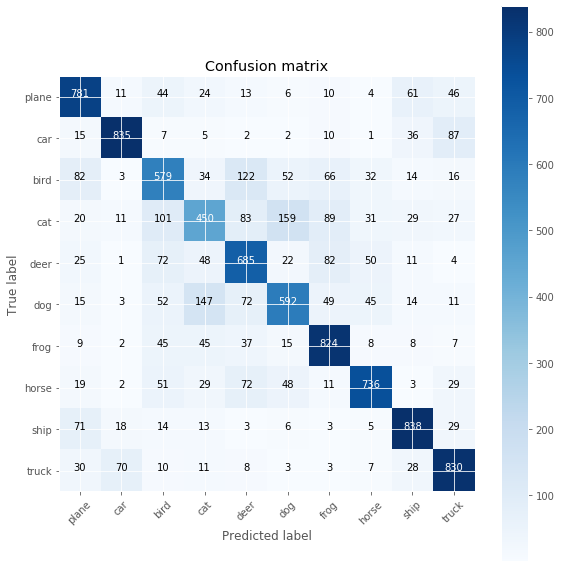

In [97]:
# Confusion matrix (15 epochs)

from sklearn.metrics import confusion_matrix

nb_classes = 10

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
preds_list_10 = []

with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        preds = torch.max(outputs, 1)[1]

        preds_list_10.append(outputs)
        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
#print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
#print(class_accuracy)

names = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.figure(figsize=(8,8))

print('Class accuracy ',class_accuracy, '\n')
plot_confusion_matrix(conf_mat, names)

Class accuracy  [72.6 74.3 56.1 49.1 62.2 61.5 68.1 71.2 78.7 80.7] 

Confusion matrix, without normalization


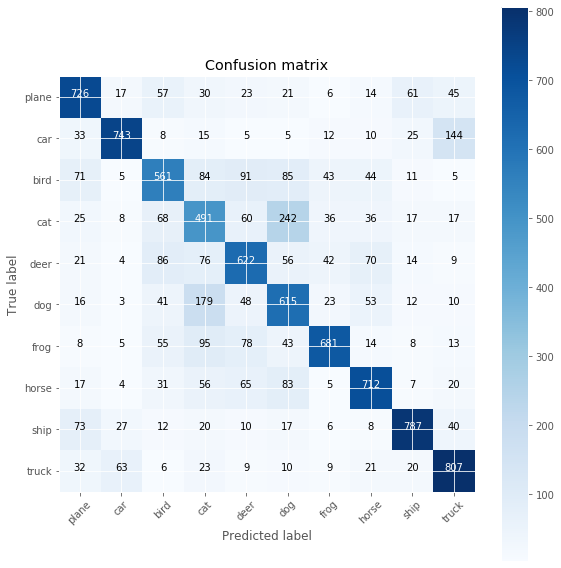

In [102]:
# Confusion matrix (65 epochs)

from sklearn.metrics import confusion_matrix

nb_classes = 10

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
preds_list_115 = []

with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        preds = torch.max(outputs, 1)[1]
        
        preds_list_115.append(outputs)
        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
#print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
#print(class_accuracy)

names = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.figure(figsize=(8,8))

print('Class accuracy ',class_accuracy, '\n')
plot_confusion_matrix(conf_mat, names)

In [103]:
preds_10 = preds_list_10[0]
preds_115 = preds_list_115[0]

In [107]:
i = 1
print(preds_10[i])
print(preds_115[i])

tensor([  5.6587,   9.8799,  -2.2969,  -4.8259,  -4.9453, -12.2045,  -5.4243,
        -10.5698,  14.8634,   7.0770], device='cuda:0')
tensor([ 17.1919,  24.3600,  -5.0133, -11.3534, -13.9503, -23.0676, -12.5385,
        -21.9283,  40.4602,  21.2623], device='cuda:0')


In [ ]:
preds_list_10
preds_list_115

In [72]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

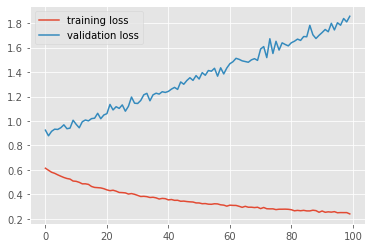

In [108]:
plt.style.use('ggplot')
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

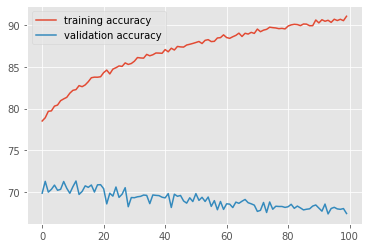

In [109]:
plt.style.use('ggplot')
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()